In [54]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import re

%matplotlib inline
sns.set(style="whitegrid")

This notebook describes an attempt of getting the exit signal for any trade.

First things first, read in the .csv into a Pandas dataframe

In [55]:
df = pd.read_csv("/Users/ernesto/lib/FOREX/tests/data/Trend_momentum_07082017.csv",sep=',',index_col=False, parse_dates=['start','end'])
print(df.columns)

Index(['Unnamed: 0', 'start', 'end', 'pair', 'type', 'timeframe', 'outcome',
       'high', 'low', 'open', 'close', 'colour', 'merge', 'No_of_0s_high',
       'No_of_0s_low', 'No_of_0s_open', 'No_of_0s_close', 'No_of_0s_colour',
       'No_of_0s_merge', 'stretch_high', 'stretch_low', 'stretch_open',
       'stretch_close', 'stretch_colour', 'ent_high', 'ent_low', 'ent_open',
       'ent_close', 'ent_colour', 'No_of_double0_higlow',
       'No_of_double0_openclose'],
      dtype='object')


# Exploratory analysis of each of the independent variables <a class="anchor" id="first-bullet"></a>

The analysis will consider only the trades having >= 2 candles. I will create a new dataframe composed of these trades and having an additional column that will have the length (number of candles of the trade)

In [56]:
def get_seq_length(x):
    x=re.sub('\'','',x)
    return(len(x))
df['length'] = df.high.apply(get_seq_length)
filtered_data = df[df.length > 2 ]

## Length of the trade

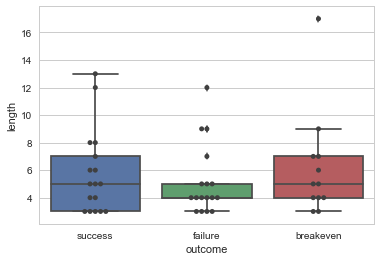

In [57]:
ax = sns.boxplot(x="outcome", y="length", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="length", data=filtered_data, color=".25")

In [58]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_length=filtered_data.loc[filtered_data['outcome'] == "success",'length']
failure_length=filtered_data.loc[filtered_data['outcome'] == "failure",'length']

print("Avg length  for success set: %f" % success_length.mean())
print("Avg length for failure set: %f" % failure_length.mean())

#performing paired t-test
stats.ttest_ind(a= success_length,b= failure_length,equal_var=False)

Avg length  for success set: 5.764706
Avg length for failure set: 5.176471


Ttest_indResult(statistic=0.60689712903440418, pvalue=0.54831966214722527)

### Conclusion
These 2 variables (length,outcome) are not associated

## Number of 0s
### High

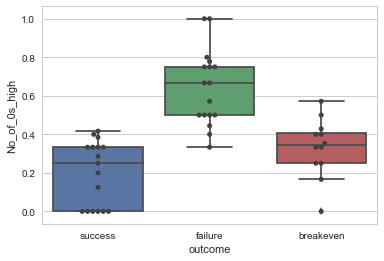

In [59]:
ax = sns.boxplot(x="outcome", y="No_of_0s_high", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_high", data=filtered_data, color=".25")

In [60]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_high=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_0s_high']
failure_high=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_0s_high']

print("Avg number of 0s for success set: %f" % success_high.mean())
print("Avg number of 0s for failure set: %f" % failure_high.mean())

#performing paired t-test
stats.ttest_ind(a= success_high,b= failure_high,equal_var=False)

Avg number of 0s for success set: 0.199725
Avg number of 0s for failure set: 0.641783


Ttest_indResult(statistic=-7.0744333419875476, pvalue=5.7841451342861e-08)

### Low

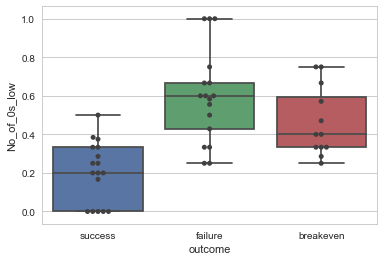

In [61]:
ax = sns.boxplot(x="outcome", y="No_of_0s_low", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_low", data=filtered_data, color=".25")

In [62]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_low=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_0s_low']
failure_low=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_0s_low']

print("Avg number of 0s for success set: %f" % success_low.mean())
print("Avg number of 0s for failure set: %f" % failure_low.mean())

#performing paired t-test
stats.ttest_ind(a= success_low,b= failure_low,equal_var=False)

Avg number of 0s for success set: 0.204627
Avg number of 0s for failure set: 0.595145


Ttest_indResult(statistic=-5.5571638221366246, pvalue=6.3632657403852792e-06)

### Open

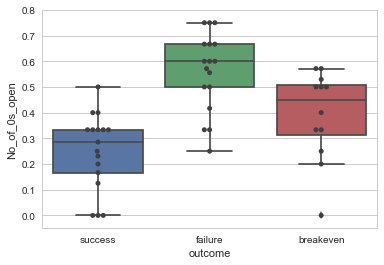

In [63]:
ax = sns.boxplot(x="outcome", y="No_of_0s_open", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_open", data=filtered_data, color=".25")

In [64]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_open=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_0s_open']
failure_open=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_0s_open']

print("Avg number of 0s for success set: %f" % success_open.mean())
print("Avg number of 0s for failure set: %f" % failure_open.mean())

#performing paired t-test
stats.ttest_ind(a= success_open,b= failure_open,equal_var=False)

Avg number of 0s for success set: 0.248519
Avg number of 0s for failure set: 0.559430


Ttest_indResult(statistic=-5.9999530606876723, pvalue=1.0880021601982171e-06)

### Close

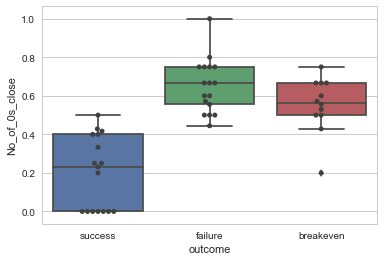

In [65]:
ax = sns.boxplot(x="outcome", y="No_of_0s_close", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_close", data=filtered_data, color=".25")

In [66]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_close=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_0s_close']
failure_close=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_0s_close']

print("Avg number of 0s for success set: %f" % success_close.mean())
print("Avg number of 0s for failure set: %f" % failure_close.mean())

#performing paired t-test
stats.ttest_ind(a= success_close,b= failure_close,equal_var=False)

Avg number of 0s for success set: 0.200549
Avg number of 0s for failure set: 0.651261


Ttest_indResult(statistic=-7.8856763443561784, pvalue=9.4356780617313848e-09)

### Colour

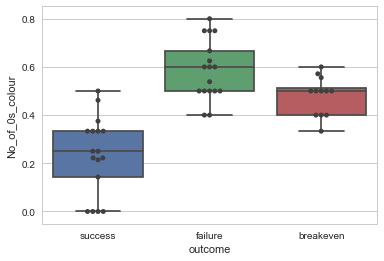

In [67]:
ax = sns.boxplot(x="outcome", y="No_of_0s_colour", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_colour", data=filtered_data, color=".25")

In [68]:
succes_coulour=0
failure_colour=0

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_colour=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_0s_colour']
failure_colour=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_0s_colour']

print("Avg number of 0s for success set: %f" % success_colour.mean())
print("Avg number of 0s for failure set: %f" % failure_colour.mean())

#performing paired t-test
stats.ttest_ind(a= success_colour,b= failure_colour,equal_var=False)

Avg number of 0s for success set: 0.233615
Avg number of 0s for failure set: 0.587066


Ttest_indResult(statistic=-7.2087283258401946, pvalue=5.0099207991078001e-08)

### Merge

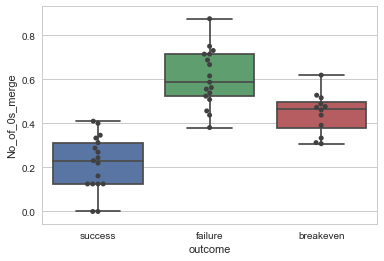

In [69]:
ax = sns.boxplot(x="outcome", y="No_of_0s_merge", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_0s_merge", data=filtered_data, color=".25")

In [70]:
succes_merge=0
failure_merge=0

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_merge=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_0s_merge']
failure_merge=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_0s_merge']

print("Avg number of 0s for success set: %f" % success_merge.mean())
print("Avg number of 0s for failure set: %f" % failure_merge.mean())

#performing paired t-test
stats.ttest_ind(a= success_merge,b= failure_merge,equal_var=False)

Avg number of 0s for success set: 0.218495
Avg number of 0s for failure set: 0.606138


Ttest_indResult(statistic=-8.8711136890648028, pvalue=3.9521055929287109e-10)

## double0s
### high_low

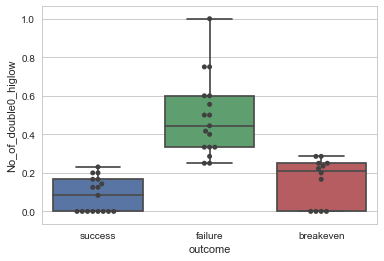

In [71]:
ax = sns.boxplot(x="outcome", y="No_of_double0_higlow", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_double0_higlow", data=filtered_data, color=".25")

In [72]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_highlow=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_double0_higlow']
failure_highlow=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_double0_higlow']

print("Avg number of double 0s for success set: %f" % success_highlow.mean())
print("Avg number of double 0s for failure set: %f" % failure_highlow.mean())

#performing paired t-test
stats.ttest_ind(a= success_highlow,b= failure_highlow,equal_var=False)

Avg number of double 0s for success set: 0.084723
Avg number of double 0s for failure set: 0.488375


Ttest_indResult(statistic=-7.4641975115946364, pvalue=1.9467672322874497e-07)

### openclose

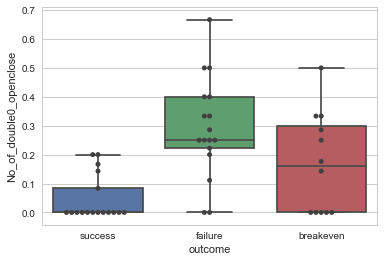

In [73]:
ax = sns.boxplot(x="outcome", y="No_of_double0_openclose", data=filtered_data)
ax = sns.swarmplot(x="outcome", y="No_of_double0_openclose", data=filtered_data, color=".25")

In [74]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_openclose=filtered_data.loc[filtered_data['outcome'] == "success",'No_of_double0_openclose']
failure_openclose=filtered_data.loc[filtered_data['outcome'] == "failure",'No_of_double0_openclose']

print("Avg number of double 0s for success set: %f" % success_openclose.mean())
print("Avg number of double 0s for failure set: %f" % failure_openclose.mean())

#performing paired t-test
stats.ttest_ind(a= success_openclose,b= failure_openclose,equal_var=False)

Avg number of double 0s for success set: 0.046639
Avg number of double 0s for failure set: 0.291317


Ttest_indResult(statistic=-5.3194636044324142, pvalue=2.3321849478351925e-05)

## Stretch
### high

In [75]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_high=filtered_data.loc[filtered_data['outcome'] == "success",'stretch_high']
failure_stretch_high=filtered_data.loc[filtered_data['outcome'] == "failure",'stretch_high']

print("Avg stretch of 0s for success set: %f" % success_stretch_high.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_high.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_high,b=failure_stretch_high,equal_var=False)

Avg stretch of 0s for success set: 0.294118
Avg stretch of 0s for failure set: 1.941176


Ttest_indResult(statistic=-3.8236169551939456, pvalue=0.00079034021521286538)

### low

In [76]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_low=filtered_data.loc[filtered_data['outcome'] == "success",'stretch_low']
failure_stretch_low=filtered_data.loc[filtered_data['outcome'] == "failure",'stretch_low']

print("Avg stretch of 0s for success set: %f" % success_stretch_low.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_low.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_low,b=failure_stretch_low,equal_var=False)

Avg stretch of 0s for success set: 0.529412
Avg stretch of 0s for failure set: 2.117647


Ttest_indResult(statistic=-3.2742309379904957, pvalue=0.0030196056820904972)

### open

In [77]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_open=filtered_data.loc[filtered_data['outcome'] == "success",'stretch_open']
failure_stretch_open=filtered_data.loc[filtered_data['outcome'] == "failure",'stretch_open']

print("Avg stretch of 0s for success set: %f" % success_stretch_open.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_open.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_open,b=failure_stretch_open,equal_var=False)

Avg stretch of 0s for success set: 0.470588
Avg stretch of 0s for failure set: 1.529412


Ttest_indResult(statistic=-3.1634983811789756, pvalue=0.0034938194545846121)

### close

In [78]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_close=filtered_data.loc[filtered_data['outcome'] == "success",'stretch_close']
failure_stretch_close=filtered_data.loc[filtered_data['outcome'] == "failure",'stretch_close']

print("Avg stretch of 0s for success set: %f" % success_stretch_close.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_close.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_close,b=failure_stretch_close,equal_var=False)

Avg stretch of 0s for success set: 0.588235
Avg stretch of 0s for failure set: 2.117647


Ttest_indResult(statistic=-4.7768782066161037, pvalue=3.7980416365972779e-05)

### colour

In [79]:
#getting the 2 series, one with differences for outcome=True and the other with outcome=False
success_stretch_colour=filtered_data.loc[filtered_data['outcome'] == "success",'stretch_colour']
failure_stretch_colour=filtered_data.loc[filtered_data['outcome'] == "failure",'stretch_colour']

print("Avg stretch of 0s for success set: %f" % success_stretch_colour.mean())
print("Avg stretch of 0s for failure set: %f" % failure_stretch_colour.mean())

#performing paired t-test
stats.ttest_ind(a=success_stretch_colour,b=failure_stretch_colour,equal_var=False)

Avg stretch of 0s for success set: 0.470588
Avg stretch of 0s for failure set: 2.117647


Ttest_indResult(statistic=-5.327296734530333, pvalue=7.7427050733183892e-06)